# **ML Project**

Dataset: Employee Analysis | Attrition Report

https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition

# Importing Library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest, SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from feature_engine.selection import SmartCorrelatedSelection
from venny4py.venny4py import *

# Data

In [19]:
df = pd.read_csv('HR Employee Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Analisys

<Axes: ylabel='JobRole'>

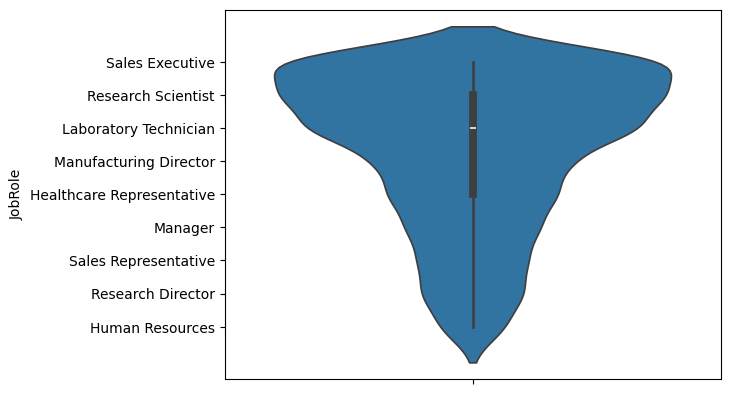

In [20]:
# Violin plot distribution JobRole

sns.violinplot(df['JobRole'])

In [21]:
# Monthly Income per Education Field
df.groupby('EducationField')[['MonthlyIncome']].mean()

,MonthlyIncome
EducationField,
Human Resources,7241.148148
Life Sciences,6463.288779
Marketing,7348.584906
Medical,6510.036638
Other,6071.548780
Technical Degree,5758.303030


In [22]:
# Monthly Income per Attrition
df.groupby('Attrition')[['MonthlyIncome']].mean()

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


# Pre-Processing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
# checking nan
df[df.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## Normalizing

In [25]:
# Split numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [26]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [27]:
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [28]:
print(df['Attrition'].unique())
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())
print(df['OverTime'].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [29]:
# Using LabelEncoder for the categorical columns
labelencoder = LabelEncoder()
for j in df.columns:
  if df[j].dtype == 'object':
    df[j] = labelencoder.fit_transform(df[j])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [30]:
# Using StandardScaler for nomalization of the numerical columns
scaler = StandardScaler()
ajuste = scaler.fit(df[numerical_cols])
df[numerical_cols] = ajuste.transform(df[numerical_cols])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [31]:
# Dropping collumns with just one unique value
constant_columns = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 1:
        constant_columns.append(column)

df.drop(columns=constant_columns, inplace=True)

print("Constant columns dropped:", constant_columns)

Constant columns dropped: ['EmployeeCount', 'Over18', 'StandardHours']


## Splitting train and test

In [32]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

## Random Forest

In [35]:
random_state = 2

In [36]:
# Random Forest
CLF = RandomForestClassifier(n_estimators = 100,random_state=random_state)
CLF.fit(X_train, y_train)
CLF_pred = CLF.predict(X_test)

## Feature Selection

In [37]:
# Mutual Information
mi = SelectKBest(mutual_info_classif, k=15)

#SmartC
smartC = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8
)

# SequentialFeatureSelector
sfs = SFS(
    estimator=CLF,
    n_features_to_select=15,
    direction='forward',
    scoring='f1'
)

## Pipeline

In [38]:
# Mutual Information
CLF1 = Pipeline([('mi', mi),
                 ('rf', CLF)])
CLF1.fit(X_train, y_train)
CLF1_pred = CLF1.predict(X_test)

# SmartC
CLF2 = Pipeline([('SmartC', smartC),
                 ('rf', CLF)])
CLF2.fit(X_train, y_train)
CLF2_pred = CLF2.predict(X_test)

# SequentialFeatureSelector
CLF3 = Pipeline([('sfs', sfs),
                 ('rf', CLF)])
CLF3.fit(X_train, y_train)
CLF3_pred = CLF3.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print('Random Forest / Mutual Information')
print(classification_report(y_test,CLF1_pred))
print()
print('Random Forest / SmartC')
print(classification_report(y_test,CLF2_pred))
print()
print('Random Forest / SFS')
print(classification_report(y_test,CLF3_pred))

Random Forest / Mutual Information
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       375
           1       0.44      0.17      0.24        66

    accuracy                           0.84       441
   macro avg       0.65      0.56      0.58       441
weighted avg       0.80      0.84      0.81       441


Random Forest / SmartC
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       375
           1       0.41      0.17      0.24        66

    accuracy                           0.84       441
   macro avg       0.64      0.56      0.57       441
weighted avg       0.80      0.84      0.81       441


Random Forest / SFS
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       375
           1       0.44      0.29      0.35        66

    accuracy                           0.84       441
   macro avg       0.66      0.61      0.63     

## Venn Diagram

In [40]:
featuresMutualInfromation = CLF1[:-1].get_feature_names_out()
featuresSmartC = CLF2[:-1].get_feature_names_out()
featuresSFS = CLF3[:-1].get_feature_names_out()

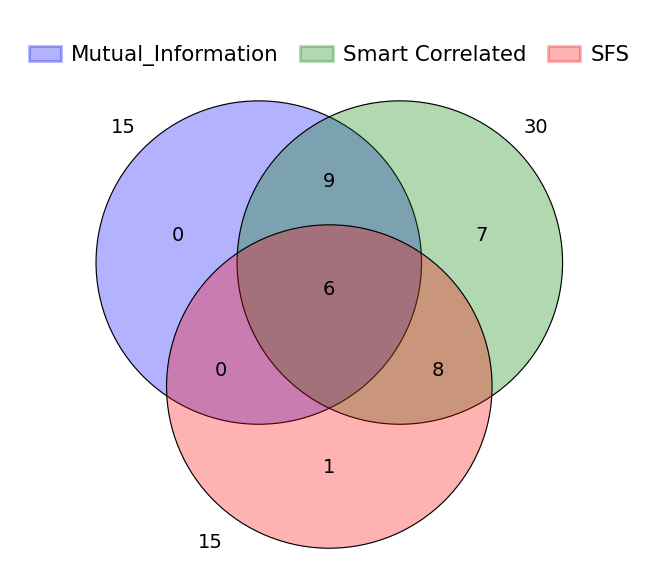

In [41]:
sets = {
    'Mutual_Information': set(featuresMutualInfromation),
    'Smart Correlated': set(featuresSmartC),
    'SFS': set(featuresSFS),
}

venny4py(sets=sets)

In [42]:
# Similar Features
best_features = list(set(featuresMutualInfromation).intersection(featuresSmartC, featuresSFS))
best_features

['YearsAtCompany',
 'YearsWithCurrManager',
 'TotalWorkingYears',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'Age']

# Model

In [43]:
# Creating a dataframe with just the best features selected
df_best = df[['Attrition'] + best_features]
df_best.head()

,Attrition,YearsAtCompany,YearsWithCurrManager,TotalWorkingYears,JobSatisfaction,NumCompaniesWorked,Age
0,1,-0.164613,0.245834,-0.421642,1.153254,2.125136,0.446350
1,0,0.488508,0.806541,-0.164511,-0.660853,-0.678049,1.322365
2,1,-1.144294,-1.155935,-0.550208,0.246200,1.324226,0.008343
3,0,0.161947,-1.155935,-0.421642,0.246200,-0.678049,-0.429664
4,0,-0.817734,-0.595227,-0.678774,-0.660853,2.525591,-1.086676


In [44]:
# Splitting the new dataframe in train and test
X = df_best.drop(['Attrition'], axis=1)
y = df_best['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [45]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [46]:
# Random Forest
forest = RandomForestClassifier(n_estimators = 100, random_state=random_state)

# KNN
knn = KNeighborsClassifier(n_neighbors=15)

# DecisionTree
dt = DecisionTreeClassifier(random_state=random_state)

In [47]:
def grid_random(clf):

  # setting param_grid
  if clf == forest:
    param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'class_weight' : ['balanced', 'balanced_subsample', None],
              'max_features': ['sqrt','log2', None]}
  elif clf == knn:
    param_grid = {'weights': ['uniform', 'distance', None],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
  elif clf == dt:
    param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_features': ['sqrt','log2', None]}
  else:
    return print('Not a KNN, Random Forest or Decision Tree Classifier')

  g_search = GridSearchCV(estimator = clf,
                        param_grid = param_grid,
                        refit=True,
                        cv = skf,
                        return_train_score=True)

  r_search = RandomizedSearchCV(estimator = clf,
                              param_distributions = param_grid,
                              cv = skf,
                              refit=True,
                              return_train_score=True)

  g_search.fit(X_train, y_train)
  y_pred_grid = g_search.predict(X_test)

  r_search.fit(X_train, y_train)
  y_pred_random = r_search.predict(X_test)

  print('Grid Search Best Parameters:', g_search.best_params_)
  print('Random Search Best Parameters:', r_search.best_params_)
  print()
  print('Grid Search Classification Report')
  print(classification_report(y_test,y_pred_grid))
  print()
  print('Random Search Classification Report')
  print(classification_report(y_test,y_pred_random))

In [48]:
grid_random(forest)

Grid Search Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}
Random Search Best Parameters: {'max_features': 'sqrt', 'criterion': 'log_loss', 'class_weight': 'balanced'}

Grid Search Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       374
           1       0.20      0.16      0.18        67

    accuracy                           0.78       441
   macro avg       0.53      0.52      0.53       441
weighted avg       0.76      0.78      0.77       441


Random Search Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       374
           1       0.20      0.16      0.18        67

    accuracy                           0.78       441
   macro avg       0.53      0.52      0.53       441
weighted avg       0.76      0.78      0.77       441



In [49]:
grid_random(knn)

Grid Search Best Parameters: {'algorithm': 'auto', 'weights': 'distance'}
Random Search Best Parameters: {'weights': 'distance', 'algorithm': 'auto'}

Grid Search Classification Report
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       374
           1       0.20      0.52      0.29        67

    accuracy                           0.61       441
   macro avg       0.54      0.57      0.51       441
weighted avg       0.78      0.61      0.66       441


Random Search Classification Report
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       374
           1       0.20      0.52      0.29        67

    accuracy                           0.61       441
   macro avg       0.54      0.57      0.51       441
weighted avg       0.78      0.61      0.66       441



In [50]:
grid_random(dt)

Grid Search Best Parameters: {'criterion': 'entropy', 'max_features': None, 'splitter': 'best'}
Random Search Best Parameters: {'splitter': 'best', 'max_features': 'sqrt', 'criterion': 'log_loss'}

Grid Search Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       374
           1       0.17      0.24      0.20        67

    accuracy                           0.71       441
   macro avg       0.51      0.52      0.51       441
weighted avg       0.75      0.71      0.73       441


Random Search Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       374
           1       0.20      0.25      0.22        67

    accuracy                           0.73       441
   macro avg       0.53      0.53      0.53       441
weighted avg       0.76      0.73      0.74       441

